In [1]:
from graphviz import Digraph

In [2]:
def example(num):
    g = Graph()
    if num == 1:
        g.node("A")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "B")
    elif num == 2:
        g.edge("A", "B")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "E")
        g.edge("A", "E")
    elif num == 3:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
    elif num == 4:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
        g.edge("E", "Z")
        g.edge("C", "Z")
        g.edge("B", "A")
    elif num == 5:
        width = 8
        height = 4
        for L1 in range(height-1):
            L2 = L1 + 1
            for i in range(width-(height-L1-1)):
                for j in range(width-(height-L2-1)):
                    node1 = str(L1)+"-"+str(i)
                    node2 = str(L2)+"-"+str(j)
                    g.edge(node1, node2)
    else:
        raise Exception("no such example")
    return g

CURR: B
TODO: [C]
CURR: C
TODO: [D]
CURR: D
True


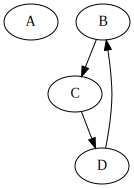

In [6]:
class Graph:
    def __init__(self):
        # name => Node
        self.nodes = {}

        self.visited = set() # Node's we've been to

    def node(self, name):
        node = Node(name)
        self.nodes[name] = node
        node.graph = self
    
    def edge(self, src, dst):
        # automatically add missing nodes
        for name in [src, dst]:
            if not name in self.nodes:
                self.node(name)
        self.nodes[src].children.append(self.nodes[dst])

    def _repr_svg_(self):
        # draw nodes+edges, non-recursively!
        g = Digraph()
        for n in self.nodes:
            g.node(n)
            for child in self.nodes[n].children:
                g.edge(n, child.name)
        return g._repr_image_svg_xml()
    
    def dfs_search(self, source, destination):
        # 1. wipe out visited
        self.visited = set()

        # 2. start the recursive search
        node1 = self.nodes[source]
        node2 = self.nodes[destination]
        return node1.dfs_search(node2)
    
    # breadth first search (BFS)
    def bfs_search(self, source, destination):
        node1 = self.nodes[source]
        node2 = self.nodes[destination]
        return node1.bfs_search(node2)

class Node:
    def __init__(self, name):
        self.name = name
        self.children = []
        self.graph = None # back reference
        self.finder = None
                
    def __repr__(self):
        return self.name
    
    # can we get from this node to the destination?
    # depth-first search (DFS)
    # v1: returns True/False (is there there a path or not?)
    # v2: return the actual paths as a tuple, like (B, C, D)
    # (2*3)  * 4 = 24
    # (2*3,) * 4 = (6, 6, 6, 6)
    def dfs_search(self, dst):
        if self in self.graph.visited:
            return None
        self.graph.visited.add(self)
        
        if self == dst:
            return (self,)
        for child in self.children:
            childpath = child.dfs_search(dst)
            if childpath != None:
                return (self,) + childpath
        return None

    # breadth first search will find the shortest path
    # (it's not recursive!)
    # v1: just return True/False (is there path)
    # v2: return the actual path as a tuple
    def bfs_search(self, dst):
        todo = [self] # work to be done (visiting nodes) -- front of list (index 0) is done first
        added = {self}
        
        while len(todo) > 0:
            # 1. check the current node
            curr_node = todo.pop(0)
            print("CURR:", curr_node)
            if curr_node == dst:
                return True
            
            # 2. record any new work that we discover
            for child in curr_node.children:
                if not (child in added):
                    todo.append(child)
                    added.add(child)
                    child.finder = curr_node
            print("TODO:", todo)

        return False
    
g = example(1)
print(g.bfs_search("B", "D"))
g

In [10]:
# TODO: write a method to chain together node, node.finder, node.finder.finder, etc (to get a path)
g.nodes["D"].finder

C

In [11]:
g.nodes["D"].finder.finder

B

In [12]:
print(g.nodes["D"].finder.finder.finder)

None
